# Training "sophisticated" approach

## Preparation

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
project_path = Path().resolve().parent
input_path = project_path / "results" / "intermediate" / "training" / "sophisticated"
#output_path = project_path / "results" / "MGE_files"

## Joined performance

In [4]:
thresholds=pd.read_csv(project_path / "results" / "intermediate" / "training" / "sophisticated_thresholds.txt", header=None)
thresholds
for i in thresholds[0]:
    print(i)


0.2 10 0.1 3
0.2 10 0.1 4
0.2 10 0.1 5
0.2 10 0.2 3
0.2 10 0.2 4
0.2 10 0.2 5
0.2 10 0.3 3
0.2 10 0.3 4
0.2 10 0.3 5
0.2 20 0.1 3
0.2 20 0.1 4
0.2 20 0.1 5
0.2 20 0.2 3
0.2 20 0.2 4
0.2 20 0.2 5
0.2 20 0.3 3
0.2 20 0.3 4
0.2 20 0.3 5
0.2 30 0.1 3
0.2 30 0.1 4
0.2 30 0.1 5
0.2 30 0.2 3
0.2 30 0.2 4
0.2 30 0.2 5
0.2 30 0.3 3
0.2 30 0.3 4
0.2 30 0.3 5
0.3 10 0.1 3
0.3 10 0.1 4
0.3 10 0.1 5
0.3 10 0.2 3
0.3 10 0.2 4
0.3 10 0.2 5
0.3 10 0.3 3
0.3 10 0.3 4
0.3 10 0.3 5
0.3 20 0.1 3
0.3 20 0.1 4
0.3 20 0.1 5
0.3 20 0.2 3
0.3 20 0.2 4
0.3 20 0.2 5
0.3 20 0.3 3
0.3 20 0.3 4
0.3 20 0.3 5
0.3 30 0.1 3
0.3 30 0.1 4
0.3 30 0.1 5
0.3 30 0.2 3
0.3 30 0.2 4
0.3 30 0.2 5
0.3 30 0.3 3
0.3 30 0.3 4
0.3 30 0.3 5
0.4 10 0.1 3
0.4 10 0.1 4
0.4 10 0.1 5
0.4 10 0.2 3
0.4 10 0.2 4
0.4 10 0.2 5
0.4 10 0.3 3
0.4 10 0.3 4
0.4 10 0.3 5
0.4 20 0.1 3
0.4 20 0.1 4
0.4 20 0.1 5
0.4 20 0.2 3
0.4 20 0.2 4
0.4 20 0.2 5
0.4 20 0.3 3
0.4 20 0.3 4
0.4 20 0.3 5
0.4 30 0.1 3
0.4 30 0.1 4
0.4 30 0.1 5
0.4 30 0.2 3
0.4 30 0.2 4

In [5]:
performance=pd.DataFrame(columns=['genome', 'score_threshold', 'n_threshold', 'fraction_threshold', 'n_scc_threshold', 'nr_tool', 'nr_toolscheme', 'nr_scheme', 'avge_dispersion', 'coverage_denominator', 'coverage_numerator'])
#performance = pd.read_csv(input_path / str(i) / "joined_performance.csv", engine="python")
for i in thresholds[0]:
    perf = pd.read_csv(input_path / str(i) / "joined_performance.csv", engine="python", names=['genome', 'score_threshold', 'n_threshold', 'fraction_threshold', 'n_scc_threshold', 'nr_tool', 'nr_toolscheme', 'nr_scheme', 'avge_dispersion', 'coverage_denominator', 'coverage_numerator'], header=None)
    performance=pd.concat([performance, perf])
performance['dispersion_weighted']=(performance.nr_toolscheme)*(pd.to_numeric(performance.avge_dispersion, errors='coerce'))
performance

,genome,score_threshold,n_threshold,fraction_threshold,n_scc_threshold,nr_tool,nr_toolscheme,nr_scheme,avge_dispersion,coverage_denominator,coverage_numerator,dispersion_weighted
0,GCA_000820965.2,0.2,10,0.1,3,2,2,12,1.0,38,38,2.0
1,GCA_000963335.1,0.2,10,0.1,3,3,1,15,1.0,20,13,1.0
2,GCA_002860885.1,0.2,10,0.1,3,5,0,14,NaN,0,0,NaN
3,GCA_001682765.1,0.2,10,0.1,3,3,0,10,NaN,0,0,NaN
4,GCA_002289685.1,0.2,10,0.1,3,8,0,8,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
45,GCA_900092635.1,0.4,30,0.3,5,11,0,6,NaN,0,0,NaN
46,GCA_001754025.1,0.4,30,0.3,5,4,0,2,NaN,0,0,NaN
47,GCA_003186985.1,0.4,30,0.3,5,1,0,1,NaN,0,0,NaN
48,GCA_002138395.1,0.4,30,0.3,5,5,1,1,1.0,65,65,1.0


In [6]:
#perf_wide=performance.pivot(index='genome', columns='n_threshold', values=['nr_tool', 'nr_toolscheme', 'nr_scheme', 'avge_dispersion', 'coverage_denominator', 'coverage_numerator'])
#perf_wide




In [7]:
measures=performance.groupby(by=['score_threshold', 'n_threshold', 'fraction_threshold', 'n_scc_threshold'], axis=0).sum()
measures=measures.loc[:, ['nr_tool', 'nr_toolscheme', 'nr_scheme', 'coverage_denominator', 'dispersion_weighted', 'coverage_numerator']]

In [12]:
measures['precision']=measures.nr_toolscheme/measures.nr_scheme
measures['recall']=measures.nr_toolscheme/measures.nr_tool
measures['coverage']=measures.coverage_numerator/measures.coverage_denominator
measures['dispersion']=measures.dispersion_weighted/measures.nr_toolscheme
measures['F-score']=2*measures.precision*measures.recall/(measures.precision+measures.recall)
m = measures.loc[:,['precision', 'recall', 'F-score', 'dispersion', 'coverage']]
m = m.reset_index()
m

,score_threshold,n_threshold,fraction_threshold,n_scc_threshold,precision,recall,F-score,dispersion,coverage
0,0.2,10,0.1,3,0.044372,0.198068,0.072502,1.097561,0.800898
1,0.2,10,0.1,4,0.044517,0.198068,0.072695,1.097561,0.799401
2,0.2,10,0.1,5,0.044614,0.198068,0.072824,1.073171,0.789671
3,0.2,10,0.2,3,0.041667,0.207729,0.069411,1.069767,0.777151
4,0.2,10,0.2,4,0.042659,0.207729,0.070782,1.069767,0.772214
...,...,...,...,...,...,...,...,...,...
76,0.4,30,0.2,4,0.242105,0.111111,0.152318,1.000000,0.861668
77,0.4,30,0.2,5,0.250000,0.115942,0.158416,1.000000,0.862461
78,0.4,30,0.3,3,0.215686,0.106280,0.142395,1.000000,0.866516
79,0.4,30,0.3,4,0.225225,0.120773,0.157233,1.000000,0.880359


In [14]:
font = {'family' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


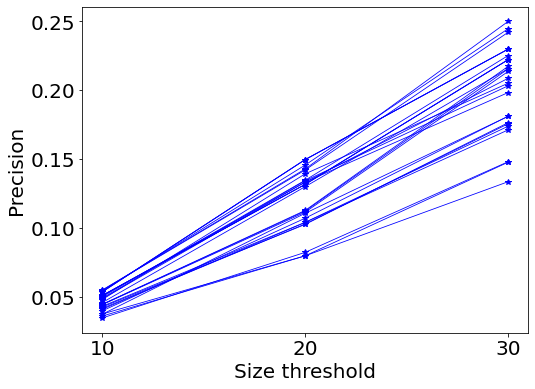

In [17]:
m=m.sort_values(['n_scc_threshold', 'fraction_threshold', 'score_threshold', 'n_threshold'])
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([10, 20, 30],m.iloc[i:i+3,-5], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Size threshold")
ax.set_xticks([10, 20, 30])
#ax.set_
#ax.set_xticklabels([10, 20, 30], fontsize=12)
ax.set_ylabel("Precision")
#ax.set_yticklabels(fontsize=20)
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_soph_precision_size.png", bbox_inches='tight')


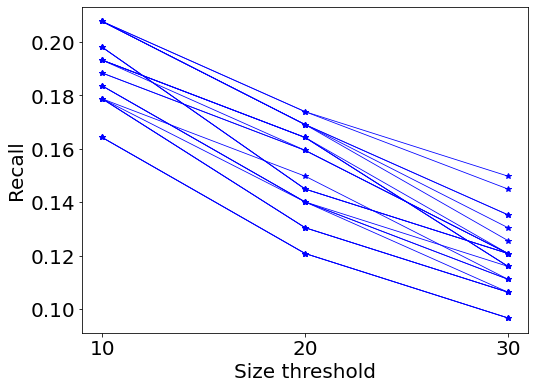

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([10, 20, 30],m.iloc[i:i+3,-4], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Size threshold")
ax.set_xticks([10, 20, 30])
ax.set_ylabel("Recall")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_soph_recall_size.png", bbox_inches='tight')


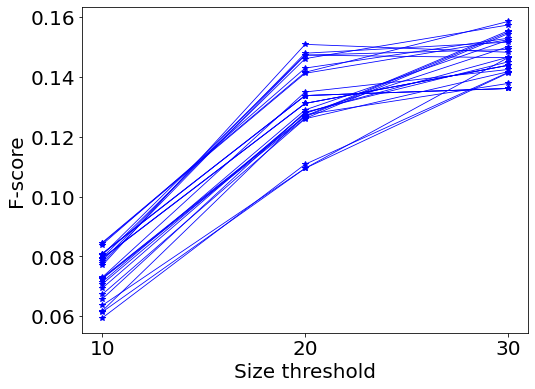

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([10, 20, 30],m.iloc[i:i+3,-3], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Size threshold")
ax.set_xticks([10, 20, 30])
ax.set_ylabel("F-score")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_soph_F_size.png")


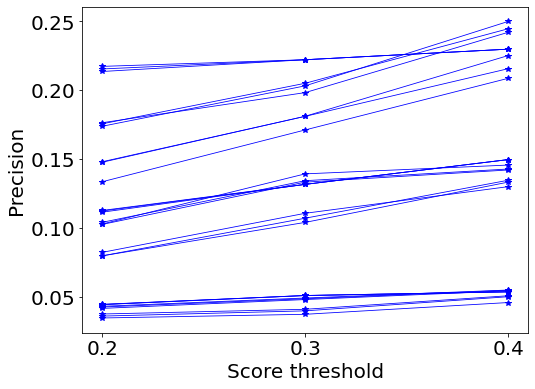

In [21]:
m=m.sort_values(['n_scc_threshold', 'fraction_threshold', 'n_threshold', 'score_threshold'])
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([0.2, 0.3, 0.4],m.iloc[i:i+3,-5], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Score threshold")
ax.set_xticks([0.2, 0.3, 0.4])
ax.set_ylabel("Precision")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_soph_precision_score.png", bbox_inches='tight')


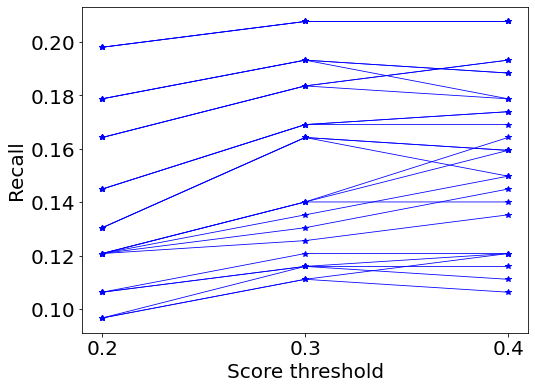

In [22]:
m=m.sort_values(['n_threshold', 'score_threshold'])
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([0.2, 0.3, 0.4],m.iloc[i:i+3,-4], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Score threshold")
ax.set_xticks([0.2, 0.3, 0.4])
ax.set_ylabel("Recall")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "toph_simple_recall_score.png", bbox_inches='tight')


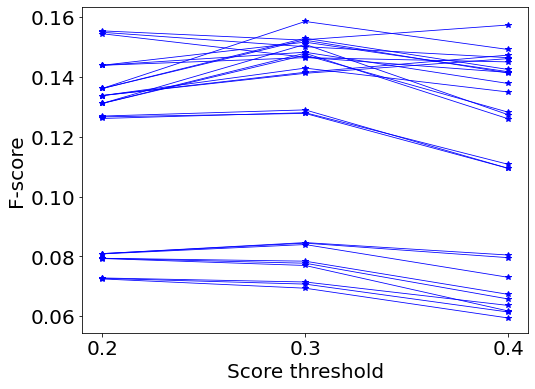

In [23]:
m=m.sort_values(['n_threshold', 'score_threshold'])
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([0.2, 0.3, 0.4],m.iloc[i:i+3,-3], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Score threshold")
ax.set_xticks([0.2, 0.3, 0.4])
ax.set_ylabel("F-score")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_soph_F_score.png", bbox_inches='tight')


In [ ]:
m=m.sort_values(['n_scc_threshold', 'n_threshold', 'score_threshold', 'fraction_threshold'])
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([0.2, 0.3, 0.4],m.iloc[i:i+3,-5], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Score threshold")
ax.set_xticks([0.2, 0.3, 0.4])
ax.set_ylabel("Precision")
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_soph_precision_score.png", bbox_inches='tight')